### ■ Sample Code for Data Preparation
#### Steps
1. Extract side effects and indications from SIDER
2. Prepare binary relationship matrices of side effects and indications
3. Merge and extract intersection

In [1]:
import sys
sys.path.append('C:/github/NRMMF')

from Data_Preparation import sider_rel_extraction_reflect_meddra as sr

***
#### 1. Extract side effects information from SIDER

In [2]:
side_dat = sr.SiderSideEffectExtractor()
side_dat.set_raw()
side_dat.narrow_meddra_type(target=["PT"])
side_dat.create_table()
se_table = side_dat.cont_table # 1429 drugs and 4138 diseases

7it [00:00, 66.11it/s]

registered compounds : 1430
registered side-effects : 6061
23241 terms were selcted


1429it [00:22, 64.23it/s]

completed


***
#### 2. Extract indications information from SIDER

In [3]:
ind_dat = sr.SiderIndicationExtractor()
ind_dat.set_raw()
ind_dat.narrow_meddra_type(target=["PT"])
ind_dat.create_table()
ind_table = ind_dat.cont_table # 1423 drugs and 2154 diseases

53it [00:00, 529.97it/s]

registered compounds : 1437
registered indications : 3046
23241 terms were selcted


1423it [00:02, 515.12it/s]

completed


***
#### 3. Merge two tables

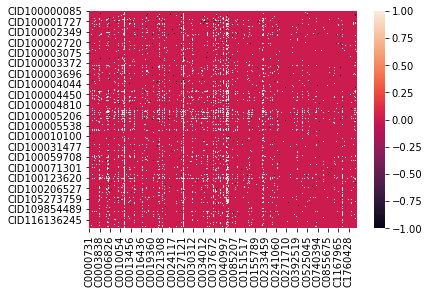

sparsity : 0.046845983536758444


In [4]:
from Data_Preparation import merge_tables as mt

merge_dat = mt.MergeTables()
merge_dat.set_tables(table1=se_table,table2=ind_table)
merge_dat.merge(method="intersec")
merge_table = merge_dat.merged_table # 1355 drugs and 1625 diseases